In [11]:
import pandas as pd
import numpy as np

df = pd.read_csv("../datasets/house-prices-advanced-regression/train.csv")

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<Axes: >

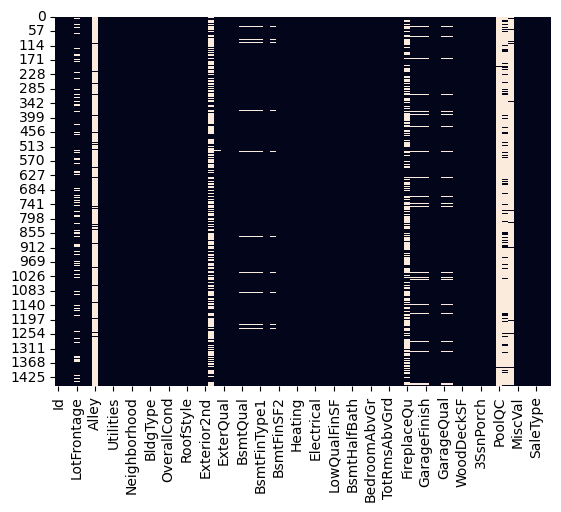

In [4]:
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False)


In [6]:
df.shape

(1460, 81)

In [7]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


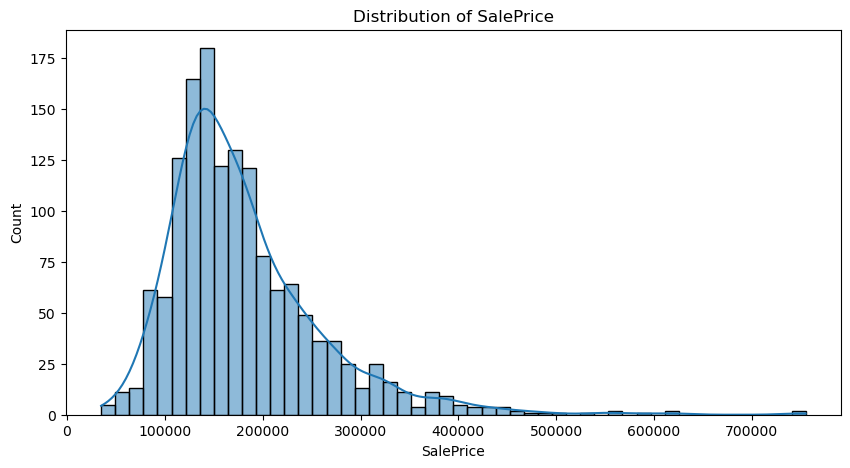

In [8]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10,5))
sns.histplot(df["SalePrice"],bins=50, kde=True)
plt.title("Distribution of SalePrice")
plt.show()

In [12]:
df["SalePrice"] = np.log1p(df["SalePrice"])

In [14]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

missing.head(15)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
dtype: int64

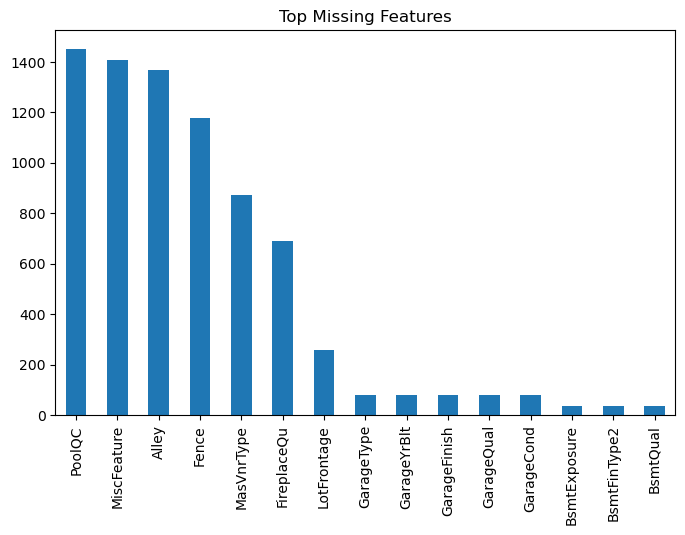

In [15]:
plt.figure(figsize=(8,5))
missing.head(15).plot(kind="bar")
plt.title("Top Missing Features")
plt.show()

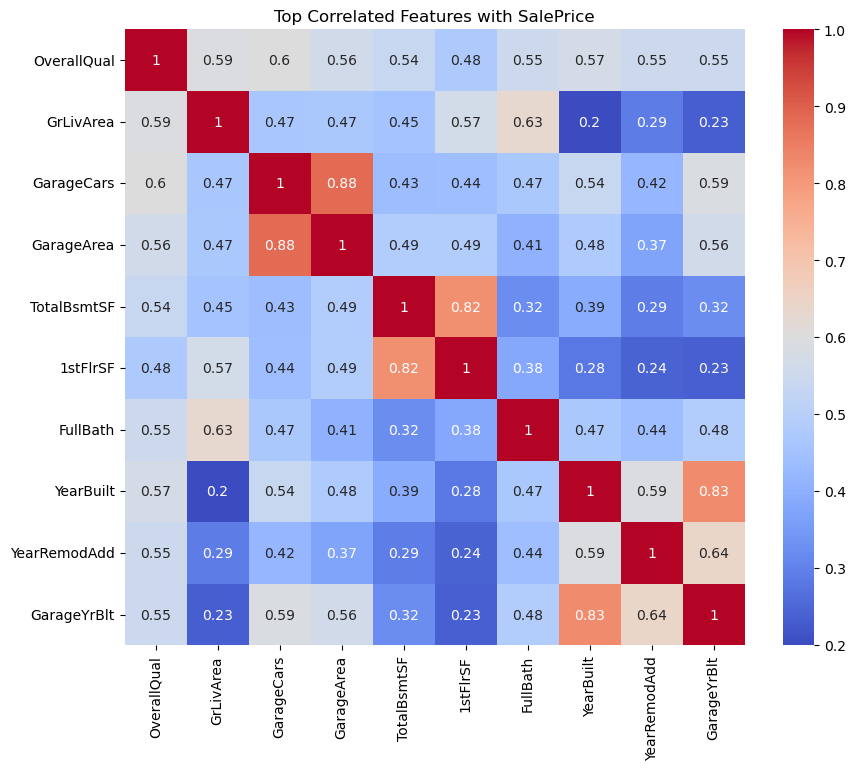

In [16]:
corr = df.corr(numeric_only=True)

top_corr = corr["SalePrice"].sort_values(ascending=False)


top_features = top_corr.index[1:11]

plt.figure(figsize=(10,8))
sns.heatmap(
    df[top_features].corr(),
    annot=True,
    cmap="coolwarm"
)
plt.title("Top Correlated Features with SalePrice")
plt.show()

In [17]:
y = df["SalePrice"]
X = df.drop(["SalePrice", "Id"], axis=1)

In [18]:
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns

In [19]:
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy="median")
X[numeric_features] = num_imputer.fit_transform(X[numeric_features])

In [20]:
cat_imputer = SimpleImputer(strategy="most_frequent")
X[categorical_features] = cat_imputer.fit_transform(X[categorical_features])

In [21]:
X = pd.get_dummies(X, drop_first=True)

X

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,...,False,False,False,False,True,False,False,False,True,False
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,...,False,False,False,False,True,False,False,False,True,False
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,...,False,False,False,False,True,False,False,False,True,False
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,...,False,False,False,False,True,False,False,False,False,False
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60.0,62.0,7917.0,6.0,5.0,1999.0,2000.0,0.0,0.0,0.0,...,False,False,False,False,True,False,False,False,True,False
1456,20.0,85.0,13175.0,6.0,6.0,1978.0,1988.0,119.0,790.0,163.0,...,False,False,False,False,True,False,False,False,True,False
1457,70.0,66.0,9042.0,7.0,9.0,1941.0,2006.0,0.0,275.0,0.0,...,False,False,False,False,True,False,False,False,True,False
1458,20.0,68.0,9717.0,5.0,6.0,1950.0,1996.0,0.0,49.0,1029.0,...,False,False,False,False,True,False,False,False,True,False


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)


In [28]:
from sklearn.tree import DecisionTreeRegressor

In [32]:
model = DecisionTreeRegressor(max_depth=5)

model.fit(X_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [33]:
from sklearn.metrics import mean_squared_error, r2_score



y_pred = model.predict(X_test)

# 4. Evaluate (Using RMSE - Root Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")



Root Mean Squared Error (RMSE): 0.20071682453084871
R2 Score: 0.7841110860921962


In [34]:
from sklearn.metrics import r2_score

# 1. Predict on BOTH sets
y_train_pred =model.predict(X_train)  # The data it studied
y_test_pred =model.predict(X_test)    # The exam questions

# 2. Calculate Scores
train_score = r2_score(y_train, y_train_pred)
test_score = r2_score(y_test, y_test_pred)

print(f"Training R2: {train_score:.4f}")
print(f"Test R2:     {test_score:.4f}")
print(f"Difference:  {train_score - test_score:.4f}")

Training R2: 0.8378
Test R2:     0.7841
Difference:  0.0537
